In [1]:
import matplotlib.pyplot as plt
import csv
import os 
import numpy as np
import datetime
import timple
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)


tmpl = timple.Timple()
tmpl.enable()
dir_path = os.path.abspath("")

<Figure size 640x480 with 0 Axes>

In [33]:
def get_average_from_csv(location):
    average_times = []
    for numClients in client_range:
        with open(location+str(numClients)+'_clients.csv', newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')

            for row in spamreader:
                av_time = sum([int(x) for x in row if x != "" and x != "0"])/len(row)
                average_times.append(datetime.timedelta(microseconds=int(av_time/1000)))
    return np.array(average_times)

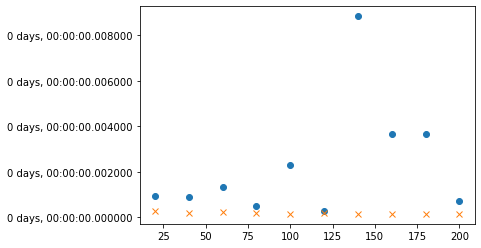

In [3]:
client_range = range(20, 201, 20)
xpoints = [x for x in client_range]

average_times_TCP = get_average_from_csv(dir_path + "\\messageSize\\TCP\\")
average_times_QUIC = get_average_from_csv(dir_path + "\\messageSize\\QUIC\\")
average_times_UDP = get_average_from_csv(dir_path + "\\messageSize\\UDP\\")



plt.plot(xpoints, average_times_TCP, 'o')
# plt.plot(xpoints, average_times_QUIC)
plt.plot(xpoints, average_times_UDP, 'x')
plt.show()

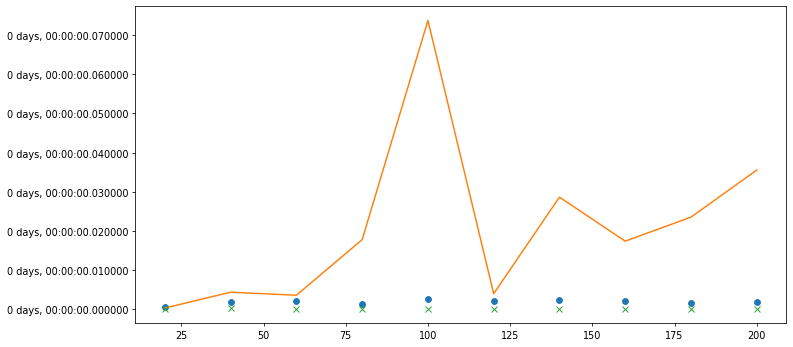

In [4]:
client_range = range(20, 201, 20)
xpoints = [x for x in client_range]

figure(figsize=(12, 6), dpi=70)


plt.plot(xpoints, get_average_from_csv(dir_path + "\\messageSize\\200\\TCP\\"), 'o')
plt.plot(xpoints, get_average_from_csv(dir_path + "\\messageSize\\200\\QUIC\\"))
plt.plot(xpoints, get_average_from_csv(dir_path + "\\messageSize\\200\\UDP\\"), 'x')
plt.show()

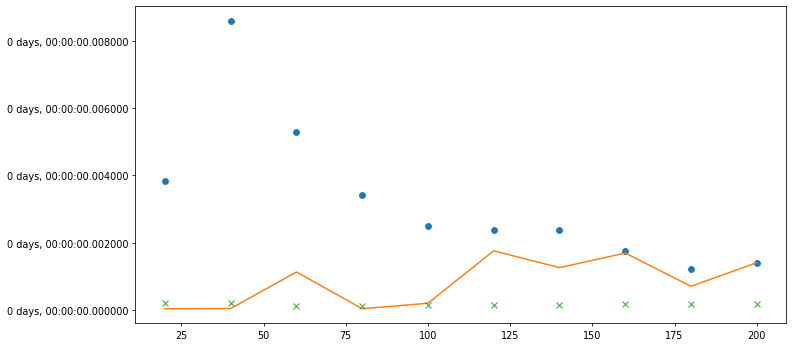

In [5]:
client_range = range(20, 201, 20)
xpoints = [x for x in client_range]

figure(figsize=(12, 6), dpi=70)


plt.plot(xpoints, get_average_from_csv(dir_path + "\\messageSize\\50\\TCP\\"), 'o')
plt.plot(xpoints, get_average_from_csv(dir_path + "\\messageSize\\50\\QUIC\\"))
plt.plot(xpoints, get_average_from_csv(dir_path + "\\messageSize\\50\\UDP\\"), 'x')
plt.show()

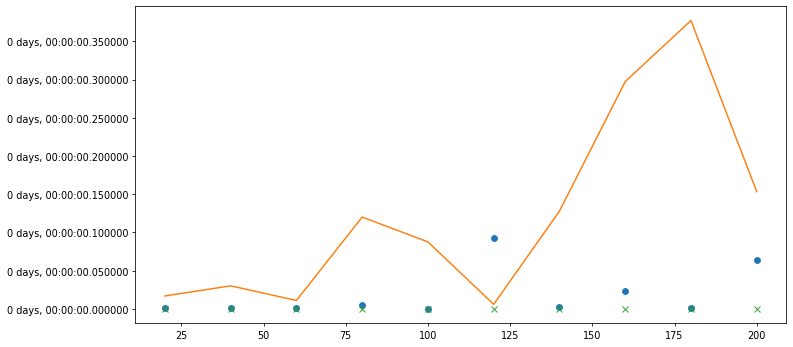

In [6]:
client_range = range(20, 201, 20)
xpoints = [x for x in client_range]

figure(figsize=(12, 6), dpi=70)


plt.plot(xpoints, get_average_from_csv(dir_path + "\\messageSize\\500\\TCP\\"), 'o')
plt.plot(xpoints, get_average_from_csv(dir_path + "\\messageSize\\500\\QUIC\\"))
plt.plot(xpoints, get_average_from_csv(dir_path + "\\messageSize\\500\\UDP\\"), 'x')
plt.show()

In [7]:
def get_loss_from_csv(location, client_range, filename):
    latencies = []
    for numClients in client_range:
        with open(location+str(numClients)+'_' + filename + '.csv', newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')

            for row in spamreader:
                latency = 0
                for i in range(0, len([x for x in row if x != ""]), 3):
                    received_packets, expected_packets = int(row[i+1]), int(row[i+2])
                    latency += (received_packets -1) / expected_packets 
                latency /= (len([x for x in row if x != ""])/3)
                latencies.append(1-latency)
    return np.array(latencies)*100

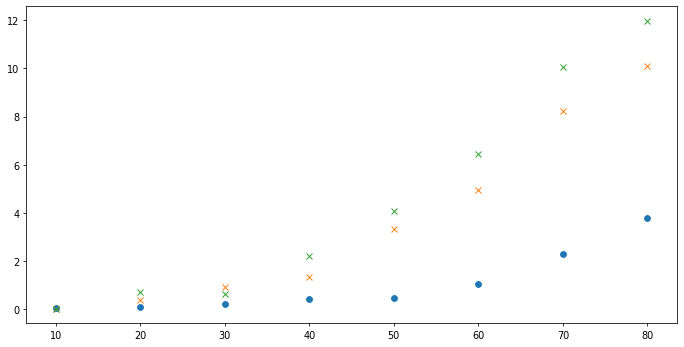

In [8]:
client_range = range(10, 81, 10)
xpoints = [x for x in client_range]

figure(figsize=(12, 6), dpi=70)
udp_loss = get_loss_from_csv(dir_path + "\\lossTests\\UDP\\packet_1B\\", client_range, "clients")
plt.plot(xpoints, udp_loss, 'o')

udp_loss = get_loss_from_csv(dir_path + "\\lossTests\\UDP\\packet_128B\\", client_range, "clients")
plt.plot(xpoints, udp_loss, 'x')

udp_loss = get_loss_from_csv(dir_path + "\\lossTests\\UDP\\packet_512B\\", client_range, "clients")
plt.plot(xpoints, udp_loss, 'x')

plt.show()

In [27]:
def latency_load(numClients, location, client_range, filename):
    with open(location+str(numClients)+'_' + filename + '.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        latencies = []
        for row in spamreader:
            for i in range(0, len([x for x in row if x != ""])):
                latencies.append(float(row[i]))
        return np.array(latencies)

def get_latency_from_csv(location, client_range, filename):
    serverReceiveLatency, serverSendLatency = [], []
    for numClients in client_range:
        recLatency = latency_load(numClients, location, client_range, filename + "_rec")
        sendLatency = latency_load(numClients, location, client_range, filename + "_send")
              
        serverReceiveLatency.append(np.mean(recLatency))
        serverSendLatency.append(np.mean(sendLatency))
        
    return np.array(serverReceiveLatency), np.array(serverSendLatency)

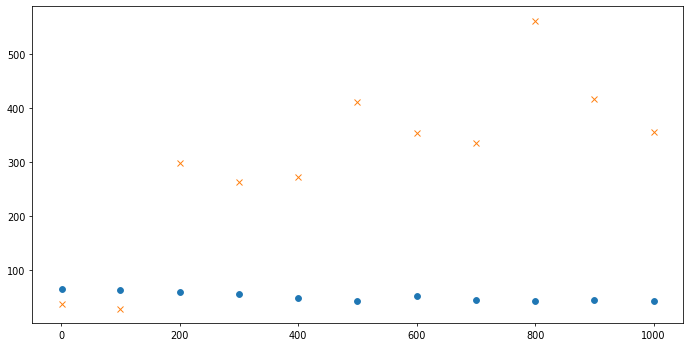

In [28]:
byte_range = [x for x in range(100, 1001, 100)]
byte_range = [1] + byte_range
xpoints = [x for x in byte_range]


figure(figsize=(12, 6), dpi=70)

TCP_rec_latency, TCP_send_latency = get_latency_from_csv(dir_path + "\\latencyTests\\TCP\\client_100\\", byte_range, "bytes")

plt.plot(xpoints, TCP_rec_latency, 'o')
plt.plot(xpoints, TCP_send_latency, 'x')
plt.show()

[1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] [84.51837823 68.62899367 35.65045193 34.24068485 37.82541307 28.68038073
 35.2897654  33.10041957 34.78196901 35.48732934 30.79121829]


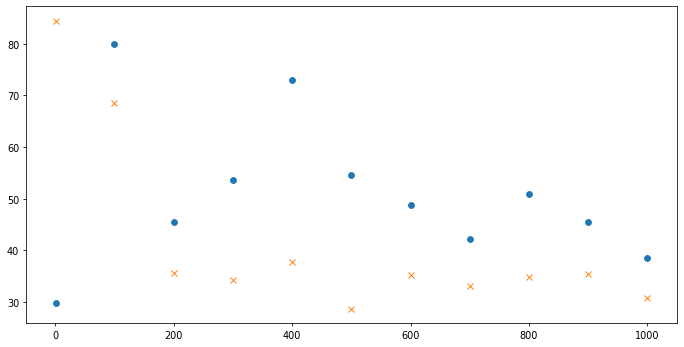

In [30]:
byte_range = [x for x in range(100, 1001, 100)]
byte_range = [1] + byte_range
xpoints = [x for x in byte_range]


figure(figsize=(12, 6), dpi=70)

QUIC_rec_latency, QUIC_send_latency = get_latency_from_csv(dir_path + "\\latencyTests\\QUIC\\client_100\\", byte_range, "bytes")

print(xpoints, QUIC_send_latency)

plt.plot(xpoints, QUIC_rec_latency, 'o')
plt.plot(xpoints, QUIC_send_latency, 'x')
plt.show()

[1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] [24.79370739 24.67045124 25.10872486 24.97788917 24.75673524 25.75702706
 24.98417714 24.97588957 25.21009002 25.69354917 24.94131844]


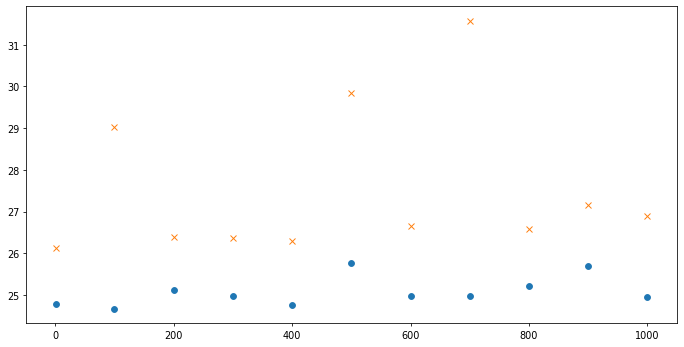

In [31]:
byte_range = [x for x in range(100, 1001, 100)]
byte_range = [1] + byte_range
xpoints = [x for x in byte_range]


figure(figsize=(12, 6), dpi=70)

UDP_rec_latency, UDP_send_latency = get_latency_from_csv(dir_path + "\\latencyTests\\UDP\\client_100\\", byte_range, "bytes")

print(xpoints, UDP_rec_latency)

plt.plot(xpoints, UDP_rec_latency, 'o')
plt.plot(xpoints, UDP_send_latency, 'x')
plt.show()

In [36]:
def get_average_packet_from_csv(location, packetRange):
    average_times = []
    for size in packetRange:
        with open(location+"packet_"+str(size)+'B.csv', newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')

            for row in spamreader:
                av_time = sum([int(x) for x in row if x != "" and x != "0"])/len(row)
                average_times.append(datetime.timedelta(microseconds=int(av_time/1000)))
    return np.array(average_times)

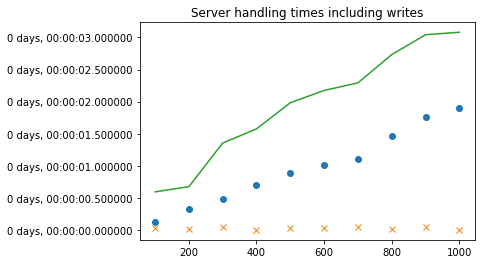

In [53]:
packet_range = range(100, 1001, 100)
xpoints = [x for x in client_range]

average_times_TCP = get_average_packet_from_csv(dir_path + "\\handlingTest\\TCP\\includingWrites\\", packet_range)

average_times_UDP = get_average_packet_from_csv(dir_path + "\\handlingTest\\UDP\\includingWrites\\", packet_range)

average_times_QUIC = get_average_packet_from_csv(dir_path + "\\handlingTest\\QUIC\\includingWrites\\", packet_range)

plt.title("Server handling times including writes and queue time")

plt.plot(xpoints, average_times_TCP, 'o')
plt.plot(xpoints, average_times_UDP, 'x')
plt.plot(xpoints, average_times_QUIC)

plt.show()


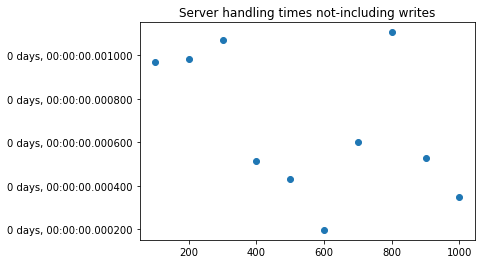

In [57]:
packet_range = range(100, 1001, 100)
xpoints = [x for x in client_range]

average_times_TCP = get_average_packet_from_csv(dir_path + "\\handlingTest\\TCP\\clients_100\\", packet_range)

# average_times_UDP = get_average_packet_from_csv(dir_path + "\\handlingTest\\UDP\\includingWrites\\", packet_range)

# average_times_QUIC = get_average_packet_from_csv(dir_path + "\\handlingTest\\QUIC\\includingWrites\\", packet_range)

plt.title("Server handling times not-including writes")

plt.plot(xpoints, average_times_TCP, 'o')
# plt.plot(xpoints, average_times_UDP, 'x')
# plt.plot(xpoints, average_times_QUIC)

plt.show()